# An exploratory study of Heart Desease

## Introduction

The dataset is provided by [UCI Machine Learning Repository][1], the original database contains 76 attributes, but all published experiments refer to using a subset of 14 of them:

1. Age: The person's age in years
2. Sex: The person's sex (1=male, 0=female)
3. Chest Pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)*
4. Resting Blood Pressure (mm Hg on admission to the hospital)
5. Serum Cholestoral in mg/dl
6. Fasting Blood Sugar (> 120 mg/dl, 1 = true; 0 = false)
7. Resting Electrocardiographic results  (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)*
8. Maximum Heart Rate achieved 
9. Exercise Induced Angina (1 = yes; 0 = no)
10. Oldpeak = ST depression induced by exercise relative to rest 
11. The slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)*
12. Number of Major Vessels (0-3) colored by flourosopy 
13. Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)*
14. Heart disease (0 = no, 1 = yes)*


*according to this [post][2] on the discussion of this dataset we have some problems. So here it goes the CORRECT description of the kaggle dataset:

    cp: chest pain type
    -- Value 0: asymptomatic
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: typical angina

    restecg: resting electrocardiographic results
    -- Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria 
    -- Value 1: normal
    -- Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    slope: the slope of the peak exercise ST segment
    -- 0: downsloping
    -- 1: flat
    -- 2: upsloping

    thal: 
    -- 1 = fixed defect
    -- 2 = normal 
    -- 3 = reversable defect

    target (maybe THE most important feature): 0 = disease, 1 = no disease

    A few more things to consider:
    data #92, 158, 164, 163, 164 and 251 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)
    data #48 and 281 have thal = 0, also incorrect. They are also NaNs in the original dataset.


[1]:https://archive.ics.uci.edu/ml/datasets/Heart+Disease
[2]:https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877



## Steps of this Kernel
1. Check missing data
2. Fix the Dataset
3. Exploratory analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

print(os.listdir("../input"))

['heart.csv']


In [2]:
data = pd.read_csv('../input/heart.csv')

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing data, let's proceed to the next step.

For correcting the database we should follow this:

    data #92, 158, 163, 164 and 251 have ca=4 which is incorrect. In the original Cleveland dataset they are NaNs (so they should be removed)
    data #48 and 281 have thal = 0, also incorrect. They are also NaNs in the original dataset.

In [4]:
data.drop([48,92,158,163,164,251,281], inplace=True)

Now that we fixed the dataset let's go to the next step.

In [5]:
data2 = data.copy()

data2.columns = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Rest ECG', 'Max Heart Rate Achieved',
       'Exercise Induced Angina', 'st Depression', 'st Slope', 'Number Major Vessels', 'Thalassemia', 'Heart Desease']

data2.replace({'Sex':{0:'Female',1:'Male'},
              'Chest Pain Type':{0:'Asymptomatic',1:'Atypical Angina',2:'Non-Anginal Pain',3:'Typical Angina'},
              'Fasting Blood Sugar':{1:'> 120 mg/dl',0:'< 120 mg/dl'},
              'Rest ECG':{0:'Left Ventricular Hypertrophy',1:'Normal',2:'ST-T wave abnormality'},
              'Exercise Induced Angina':{1:'Yes',0:'No'},
              'st Slope':{0:'Downsloping',1:'Flat',2:'Upsloping'},
              'Thalassemia':{1:'Fixed Defect',2:'Normal',3:'Reversable Defect'},
              'Heart Desease':{0:'Yes',1:'No'}
              },inplace=True)


## Analysing Age Influence on the other Variables

In [6]:
sns.set(rc={'figure.figsize':(8,6)},style='white',palette="Reds_d")

First let's see the correaltion Age has with the other variables.

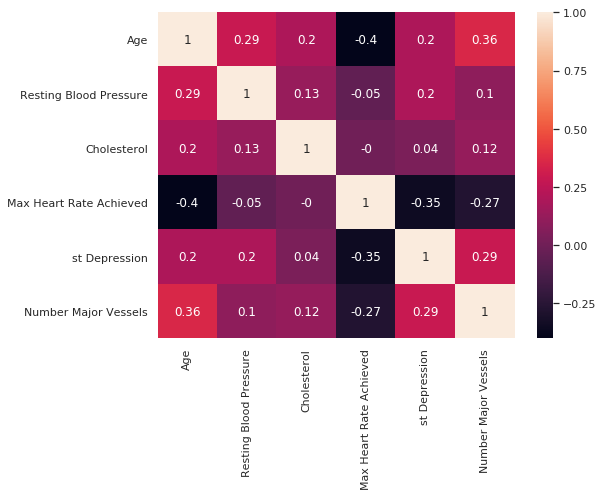

In [7]:
ax = sns.heatmap(data2.corr().round(2),annot=True)

As we can see, age have some positive correaltion with Number of Major Vessels, Resting Blood Pressure, Cholesterol and st Depression. And a negative correlation with Max Heart Rate Achieved.

,count,mean,std,min,25%,50%,75%,max
Age,296.0,54.52,9.06,29.0,48.0,56.0,61.0,77.0


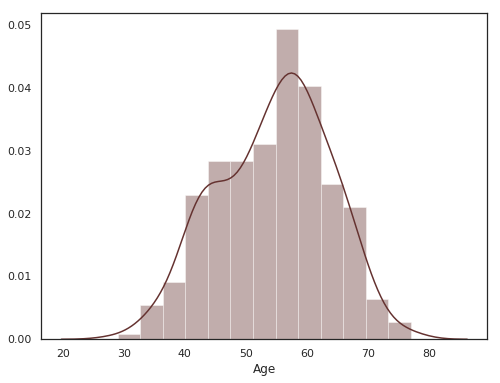

In [8]:
ax = sns.distplot(data2.Age)
pd.DataFrame(data2.Age.describe().round(2)).transpose()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
Female,95.0,55.71,9.46,34.0,49.5,57.0,63.0,76.0
Male,201.0,53.97,8.84,29.0,47.0,55.0,60.0,77.0


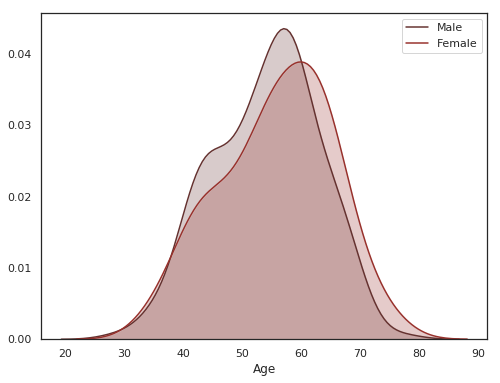

In [9]:
ax = sns.kdeplot(data2[data2['Sex']=='Male']['Age'],shade=True)
ax = sns.kdeplot(data2[data2['Sex']=='Female']['Age'],shade=True)
ax = ax.set_xlabel('Age')
plt.legend(['Male','Female'])

data2.groupby('Sex').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Chest Pain Type,,,,,,,,
Asymptomatic,141.0,55.81,8.30,35.0,51.0,57.0,62.0,77.0
Atypical Angina,49.0,51.22,9.56,29.0,44.0,52.0,57.0,74.0
Non-Anginal Pain,83.0,53.92,9.33,37.0,47.0,54.0,60.5,76.0
Typical Angina,23.0,55.87,10.03,34.0,51.5,59.0,63.5,69.0


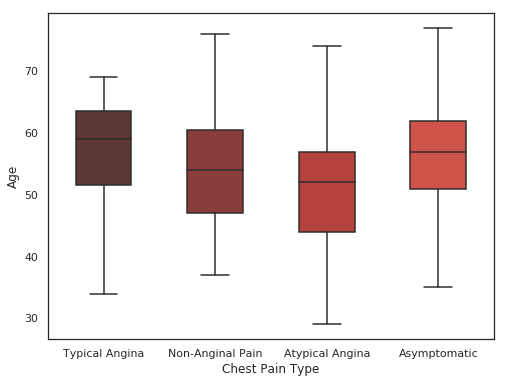

In [10]:
ax = sns.boxplot(data=data2, x='Chest Pain Type', y='Age', width=0.5)
data2.groupby('Chest Pain Type').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
"(28.952, 38.6]",10.0,124.200000,6.629899,118.0,120.0,121.0,129.0,138.0
"(38.6, 48.2]",70.0,123.542857,13.400936,94.0,112.0,121.0,131.5,152.0
"(48.2, 57.8]",94.0,131.936170,17.772038,94.0,120.0,130.0,140.0,200.0
"(57.8, 67.4]",105.0,136.219048,18.590207,100.0,124.0,136.0,150.0,180.0
"(67.4, 77.0]",17.0,138.823529,19.947541,110.0,120.0,140.0,156.0,180.0


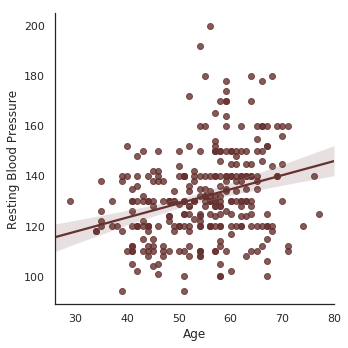

In [11]:
ax = sns.lmplot(data=data2, x='Age', y='Resting Blood Pressure')
data2.groupby(pd.cut(data2["Age"],5))['Resting Blood Pressure'].describe()

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
"(28.952, 38.6]",10.0,214.700000,31.703663,182.0,193.50,207.0,227.00,282.0
"(38.6, 48.2]",70.0,236.428571,44.088374,141.0,205.00,234.5,262.25,341.0
"(48.2, 57.8]",94.0,247.170213,49.980133,126.0,208.25,243.5,282.75,409.0
"(57.8, 67.4]",105.0,257.609524,58.397757,164.0,221.00,248.0,283.00,564.0
"(67.4, 77.0]",17.0,245.764706,47.909458,149.0,211.00,254.0,274.00,322.0


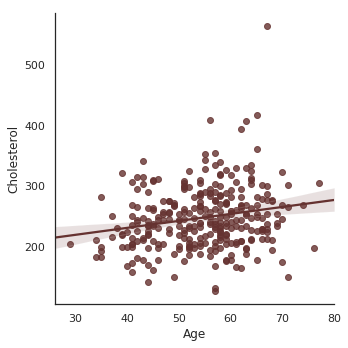

In [12]:
ax = sns.lmplot(data=data2, x='Age', y='Cholesterol')
data2.groupby(pd.cut(data2["Age"],5))['Cholesterol'].describe()

,count,mean,std,min,25%,50%,75%,max
Fasting Blood Sugar,,,,,,,,
< 120 mg/dl,253.0,54.03,9.30,29.0,46.0,55.0,61.0,77.0
> 120 mg/dl,43.0,57.44,6.84,42.0,53.0,58.0,62.0,71.0


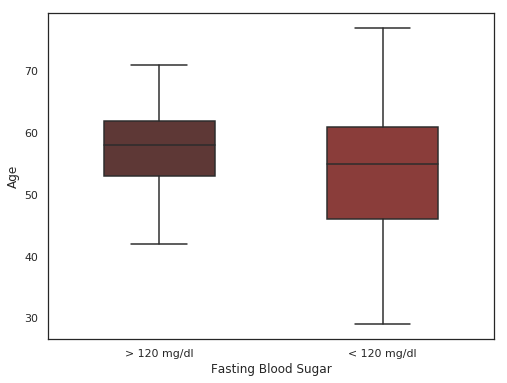

In [13]:
ax = sns.boxplot(data=data2, x='Fasting Blood Sugar', y='Age', width=0.5)
data2.groupby('Fasting Blood Sugar').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Rest ECG,,,,,,,,
Left Ventricular Hypertrophy,145.0,55.79,8.67,29.0,51.0,57.0,62.0,77.0
Normal,147.0,53.10,9.21,34.0,45.0,54.0,60.0,71.0
ST-T wave abnormality,4.0,61.00,10.10,55.0,55.0,56.5,62.5,76.0


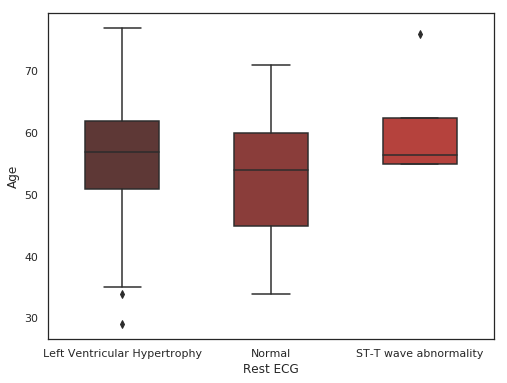

In [14]:
ax = sns.boxplot(data=data2, x='Rest ECG', y='Age', width=0.5)
data2.groupby('Rest ECG').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
"(28.952, 38.6]",10.0,174.900000,20.201485,130.0,171.00,178.0,185.75,202.0
"(38.6, 48.2]",70.0,160.257143,19.382261,114.0,148.25,164.0,176.50,194.0
"(48.2, 57.8]",94.0,148.595745,22.881800,88.0,130.50,155.0,163.00,195.0
"(57.8, 67.4]",105.0,143.285714,21.959628,71.0,132.00,146.0,160.00,182.0
"(67.4, 77.0]",17.0,134.705882,17.352106,109.0,121.00,131.0,150.00,162.0


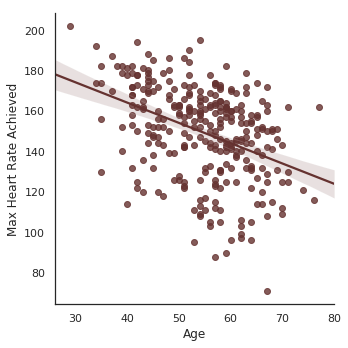

In [15]:
ax = sns.lmplot(data=data2, x='Age', y='Max Heart Rate Achieved')
data2.groupby(pd.cut(data2["Age"],5))['Max Heart Rate Achieved'].describe()

,count,mean,std,min,25%,50%,75%,max
Exercise Induced Angina,,,,,,,,
No,199.0,53.90,9.35,29.0,46.0,54.0,61.0,76.0
Yes,97.0,55.79,8.34,35.0,51.0,57.0,61.0,77.0


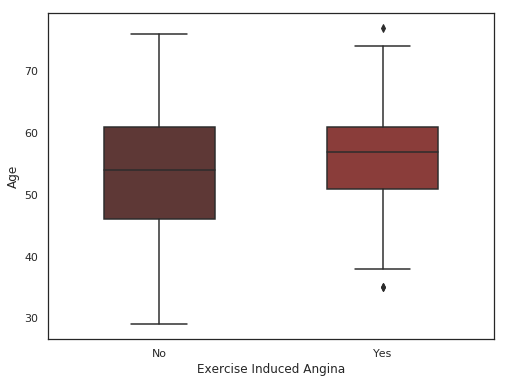

In [16]:
ax = sns.boxplot(data=data2, x='Exercise Induced Angina', y='Age', width=0.5)
data2.groupby('Exercise Induced Angina').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Age,,,,,,,,
"(28.952, 38.6]",10.0,1.100000,1.475730,0.0,0.0,0.35,1.55,3.8
"(38.6, 48.2]",70.0,0.600000,0.901368,0.0,0.0,0.00,1.00,3.6
"(48.2, 57.8]",94.0,1.001064,1.100293,0.0,0.0,0.70,1.50,5.6
"(57.8, 67.4]",105.0,1.369524,1.268033,0.0,0.2,1.00,2.20,6.2
"(67.4, 77.0]",17.0,1.329412,1.103271,0.0,0.2,1.50,2.00,3.4


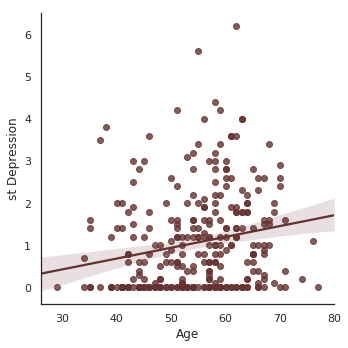

In [17]:
ax = sns.lmplot(data=data2, x='Age', y='st Depression')
data2.groupby(pd.cut(data2["Age"],5))['st Depression'].describe()

,count,mean,std,min,25%,50%,75%,max
st Slope,,,,,,,,
Downsloping,21.0,55.38,8.32,37.0,53.0,56.0,62.0,70.0
Flat,137.0,56.21,8.45,35.0,51.0,57.0,62.0,76.0
Upsloping,138.0,52.72,9.46,29.0,45.0,52.5,59.0,77.0


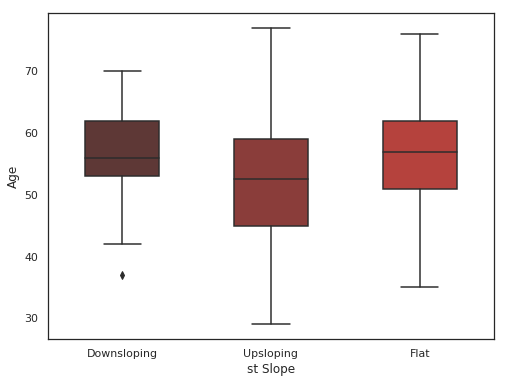

In [18]:
ax = sns.boxplot(data=data2, x='st Slope', y='Age', width=0.5)
data2.groupby('st Slope').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Number Major Vessels,,,,,,,,
0,173.0,51.64,9.23,29.0,44.00,52.0,58.00,76.0
1,65.0,57.48,6.88,41.0,54.00,57.0,61.00,74.0
2,38.0,59.79,6.58,42.0,58.00,60.0,64.00,71.0
3,20.0,59.90,8.23,45.0,52.75,62.0,65.25,77.0


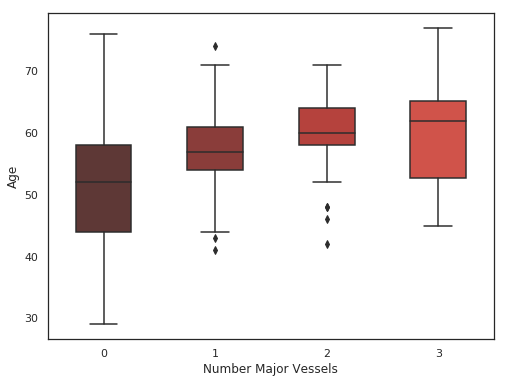

In [19]:
ax = sns.boxplot(data=data2, x='Number Major Vessels', y='Age', width=0.5)
data2.groupby('Number Major Vessels').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Thalassemia,,,,,,,,
Fixed Defect,18.0,56.67,7.65,41.0,56.0,57.5,62.0,66.0
Normal,163.0,53.44,9.80,29.0,45.0,54.0,61.0,77.0
Reversable Defect,115.0,55.72,7.96,35.0,51.5,57.0,61.0,70.0


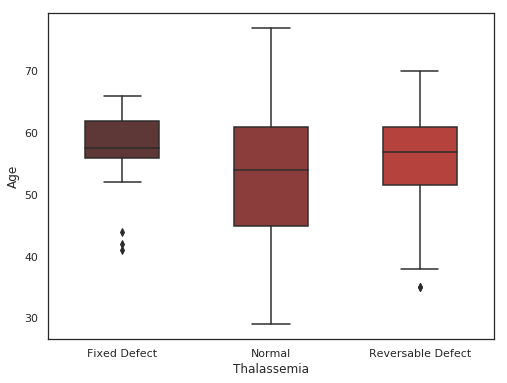

In [20]:
ax = sns.boxplot(data=data2, x='Thalassemia', y='Age', width=0.5)
data2.groupby('Thalassemia').Age.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Heart Desease,,,,,,,,
No,160.0,52.64,9.55,29.0,44.75,52.0,59.0,76.0
Yes,136.0,56.74,7.92,35.0,52.75,58.0,62.0,77.0


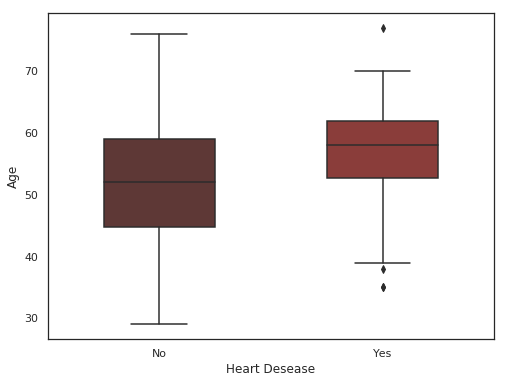

In [21]:
ax = sns.boxplot(data=data2, x='Heart Desease', y='Age', width=0.5)
data2.groupby('Heart Desease').Age.describe().round(2)

From the data obtained by the above graphs, we can say that Age has some weak impact on the other variables.

## Analysing the cause of Heart Desease

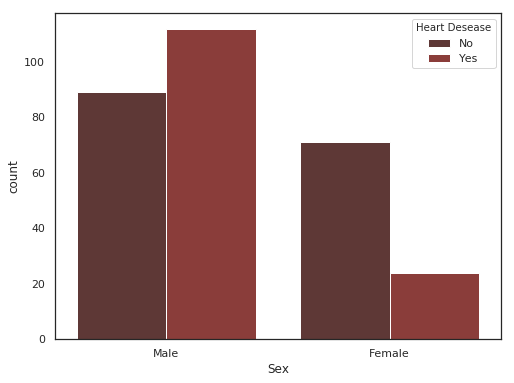

In [22]:
ax = sns.countplot(data=data2,x="Sex",hue="Heart Desease")

In [23]:
print(round(len(data2[(data2['Sex']=='Male') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Sex']=='Male')]),2))
print(round(len(data2[(data2['Sex']=='Female') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Sex']=='Female')]),2))

0.56
0.25


Proportionally Man have more Heart Desease.

,count,mean,std,min,25%,50%,75%,max
Heart Desease,,,,,,,,
No,160.0,52.64,9.55,29.0,44.75,52.0,59.0,76.0
Yes,136.0,56.74,7.92,35.0,52.75,58.0,62.0,77.0


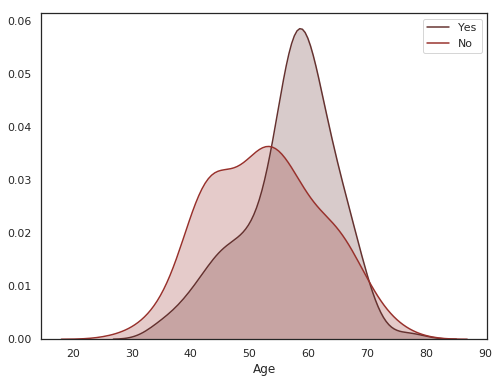

In [24]:
ax = sns.kdeplot(data2[data2['Heart Desease']=='Yes']['Age'],shade=True)
ax = sns.kdeplot(data2[data2['Heart Desease']=='No']['Age'],shade=True)
ax = ax.set_xlabel('Age')
ax = plt.legend(['Yes','No'])

data2.groupby('Heart Desease').Age.describe().round(2)

We can see that heart deseases occur more on people with 60 years old

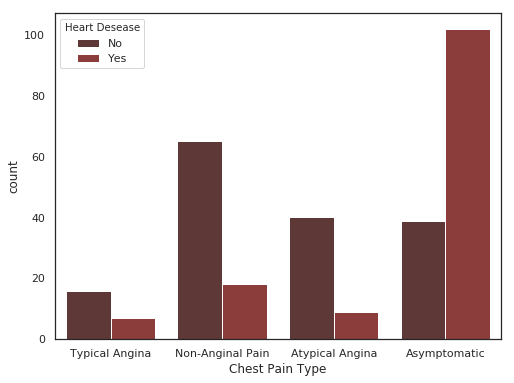

In [25]:
ax = sns.countplot(data=data2,x="Chest Pain Type",hue="Heart Desease")

In [26]:
print(len(data2[(data2['Chest Pain Type']=='Typical Angina') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Chest Pain Type']=='Typical Angina')]))
print(len(data2[(data2['Chest Pain Type']=='Non-Anginal Pain') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Chest Pain Type']=='Non-Anginal Pain')]))
print(len(data2[(data2['Chest Pain Type']=='Atypical Angina') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Chest Pain Type']=='Atypical Angina')]))
print(len(data2[(data2['Chest Pain Type']=='Asymptomatic') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Chest Pain Type']=='Asymptomatic')]))

0.30434782608695654
0.21686746987951808
0.1836734693877551
0.723404255319149


Proportionally the Chest Pain: Asymptomatic have more Heart Deseases.

,count,mean,std,min,25%,50%,75%,max
Heart Desease,,,,,,,,
No,160.0,129.18,16.37,94.0,120.0,130.0,140.0,180.0
Yes,136.0,134.46,18.86,100.0,120.0,130.0,145.0,200.0


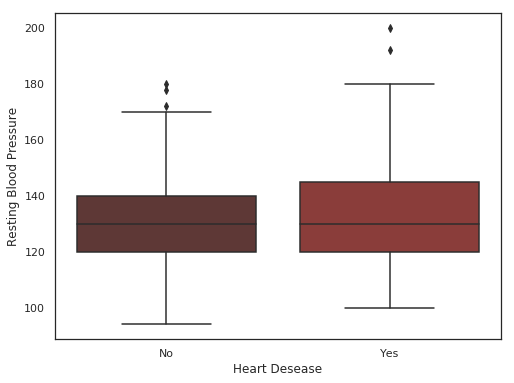

In [27]:
ax = sns.boxplot(data=data2,x='Heart Desease', y='Resting Blood Pressure')
data2.groupby('Heart Desease')['Resting Blood Pressure'].describe().round(2)

Resting Blood Presure doesnt influence on HEart Desease.

,count,mean,std,min,25%,50%,75%,max
Heart Desease,,,,,,,,
No,160.0,243.49,53.76,126.0,208.75,235.5,268.25,564.0
Yes,136.0,251.46,49.65,131.0,217.75,251.0,283.25,409.0


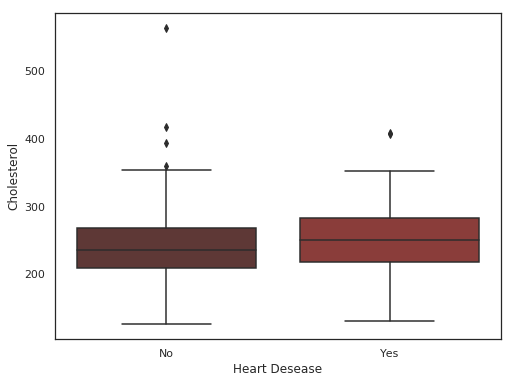

In [28]:
ax = sns.boxplot(data=data2,x='Heart Desease', y='Cholesterol')
data2.groupby('Heart Desease')['Cholesterol'].describe().round(2)

Cholesterol doesnt influence on heart desease.

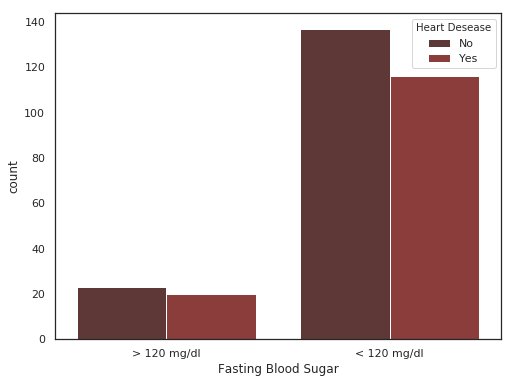

In [29]:
ax = sns.countplot(data=data2,x="Fasting Blood Sugar",hue="Heart Desease")

In [30]:
print(len(data2[(data2['Fasting Blood Sugar']=='> 120 mg/dl') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Fasting Blood Sugar']=='> 120 mg/dl')]))
print(len(data2[(data2['Fasting Blood Sugar']=='< 120 mg/dl') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Fasting Blood Sugar']=='< 120 mg/dl')]))

0.46511627906976744
0.45849802371541504


No statistical difference.

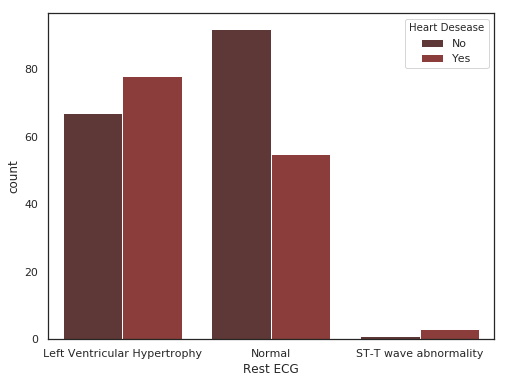

In [31]:
ax = sns.countplot(data=data2,x="Rest ECG",hue="Heart Desease")

In [32]:
print(len(data2[(data2['Rest ECG']=='Left Ventricular Hypertrophy') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Rest ECG']=='Left Ventricular Hypertrophy')]))
print(len(data2[(data2['Rest ECG']=='Normal') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Rest ECG']=='Normal')]))
print(len(data2[(data2['Rest ECG']=='ST-T wave abnormality') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Rest ECG']=='ST-T wave abnormality')]))

0.5379310344827586
0.3741496598639456
0.75


Proportionally the Rest EEG: ST-T wave abnormality have more Heart Deseases.

,count,mean,std,min,25%,50%,75%,max
Heart Desease,,,,,,,,
No,160.0,158.58,19.04,96.0,149.0,161.0,172.00,202.0
Yes,136.0,138.95,22.72,71.0,125.0,141.5,156.25,195.0


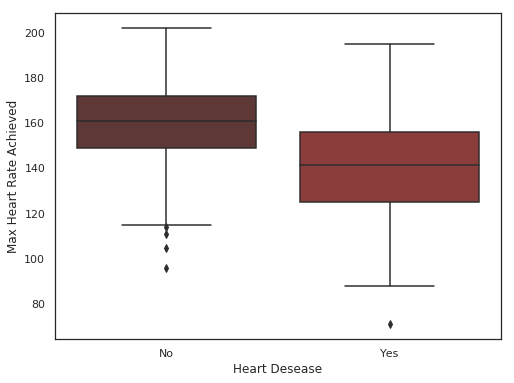

In [33]:
ax = sns.boxplot(data=data2,x='Heart Desease', y='Max Heart Rate Achieved')
data2.groupby('Heart Desease')['Max Heart Rate Achieved'].describe().round(2)

Max Heart Rate Achieved have lower values to Heart Desease.

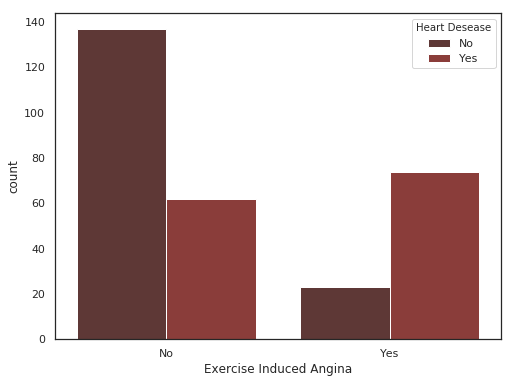

In [34]:
ax = sns.countplot(data=data2,x="Exercise Induced Angina",hue="Heart Desease")

In [35]:
print(len(data2[(data2['Exercise Induced Angina']=='No') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Exercise Induced Angina']=='No')]))
print(len(data2[(data2['Exercise Induced Angina']=='Yes') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Exercise Induced Angina']=='Yes')]))

0.31155778894472363
0.7628865979381443


Proportionally Exercise Induced Angina have more Heart deseases.

,count,mean,std,min,25%,50%,75%,max
Heart Desease,,,,,,,,
No,160.0,0.6,0.79,0.0,0.0,0.2,1.10,4.2
Yes,136.0,1.6,1.30,0.0,0.6,1.4,2.52,6.2


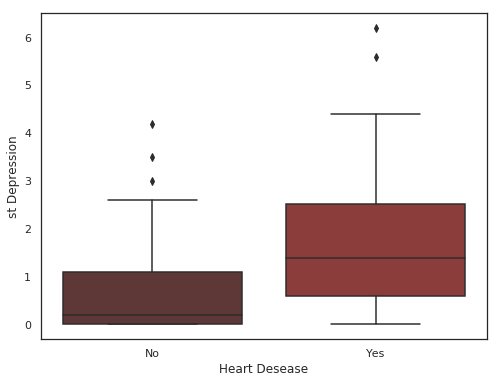

In [36]:
ax = sns.boxplot(data=data2,x='Heart Desease', y='st Depression')
data2.groupby('Heart Desease')['st Depression'].describe().round(2)

St Depression have higher values to Heart Desease

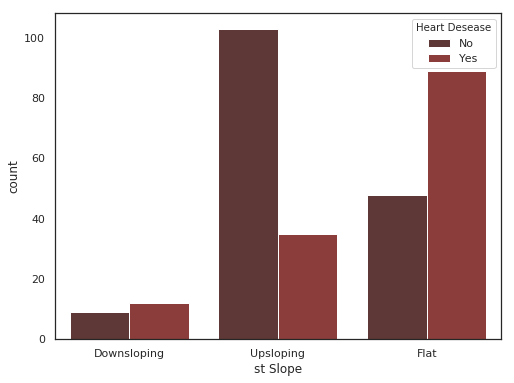

In [37]:
ax = sns.countplot(data=data2,x="st Slope",hue="Heart Desease")

In [38]:
print(len(data2[(data2['st Slope']=='Downsloping') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['st Slope']=='Downsloping')]))
print(len(data2[(data2['st Slope']=='Upsloping') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['st Slope']=='Upsloping')]))
print(len(data2[(data2['st Slope']=='Flat') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['st Slope']=='Flat')]))

0.5714285714285714
0.2536231884057971
0.6496350364963503


Proportionally st Slope of type Flat have more Heart Deseases.

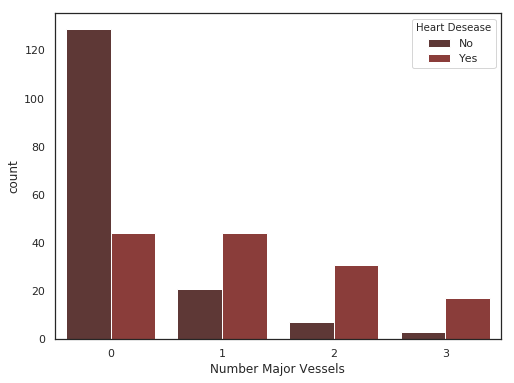

In [39]:
ax = sns.countplot(data=data2,x="Number Major Vessels",hue="Heart Desease")

In [40]:
print(len(data2[(data2['Number Major Vessels']==3) & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Number Major Vessels']==3)]))
print(len(data2[(data2['Number Major Vessels']==2) & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Number Major Vessels']==2)]))
print(len(data2[(data2['Number Major Vessels']==1) & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Number Major Vessels']==1)]))
print(len(data2[(data2['Number Major Vessels']==0) & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Number Major Vessels']==0)]))

0.85
0.8157894736842105
0.676923076923077
0.2543352601156069


Proportionally 3 and 2 Major Vessels have more Heart Deseases.

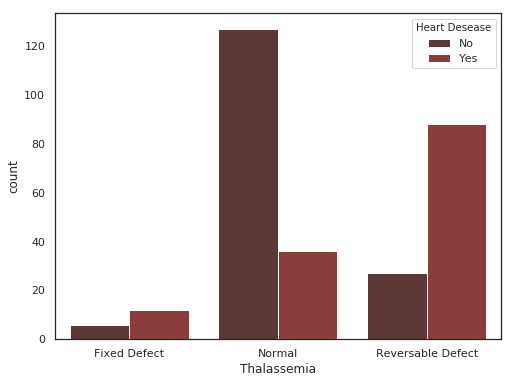

In [41]:
ax = sns.countplot(data=data2,x="Thalassemia",hue="Heart Desease")

In [42]:
print(len(data2[(data2['Thalassemia']=='Fixed Defect') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Thalassemia']=='Fixed Defect')]))
print(len(data2[(data2['Thalassemia']=='Normal') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Thalassemia']=='Normal')]))
print(len(data2[(data2['Thalassemia']=='Reversable Defect') & (data2['Heart Desease']=='Yes')])/len(data2[(data2['Thalassemia']=='Reversable Defect')]))

0.6666666666666666
0.22085889570552147
0.7652173913043478


Proportionally Thalassemia of Reversable effect have more Heart Desease.

So, we can say the variables that influences in Heart Desease:
> Sex

> Age

>Chest Pain

>Rest EEG

>Max HEart Rate Achieved

>Exercise Induced Angina

>St Depression

>st Slope

>Major Vessels

>Thalassemia

In [43]:
data2.drop(['Resting Blood Pressure','Cholesterol', 'Fasting Blood Sugar'],axis=1,inplace=True)

y = data2['Heart Desease']

data2.drop(['Heart Desease'],axis=1, inplace=True)

x = data2

In [44]:
y.replace({'Heart Desease':{'Yes':0,'No':1}},inplace=True)

In [45]:
x = pd.get_dummies(x)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, cohen_kappa_score, confusion_matrix
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

Accuracy: 0.83 (+/- 0.05)
Test score: 0.88
Cohen Kappa score: 0.76


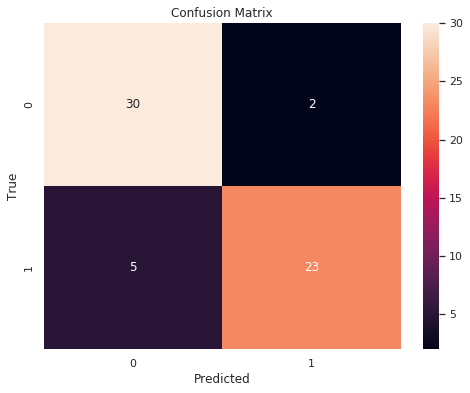

In [47]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2))


clf.fit(X_train,y_train)
print("Test score: {:.2f}".format(accuracy_score(y_test,clf.predict(X_test))))
print("Cohen Kappa score: {:.2f}".format(cohen_kappa_score(y_test,clf.predict(X_test))))
ax = sns.heatmap(confusion_matrix(y_test,clf.predict(X_test)),annot=True)
ax= ax.set(xlabel='Predicted',ylabel='True',title='Confusion Matrix')